# Self-correlation analysis of the message

In [19]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

font = {'family' : 'arial',
        'size'   : 13}

matplotlib.rc('font', **font)

bitsfile = '../../Candidates/artifacts/data17square.txt'
data = np.fromfile(bitsfile, dtype = '<i1').astype(float)

The `data` array contains the ASCII codes of the zeroes and ones in the `data17square.txt` file. We subtract the ASCII code of `0` (48) so that we have a numpy array of zeroes an dones.

In [20]:
bits = data - 48

Now we calculate the autocorrelation function of the bits

In [21]:
fftbits  = np.fft.fft(2 * (bits - .5))
bitscorr = np.fft.ifft(fftbits * np.conj(fftbits))

Text(0.5, 1.0, 'Autocorrelation plot for the central 65536 bits of the message')

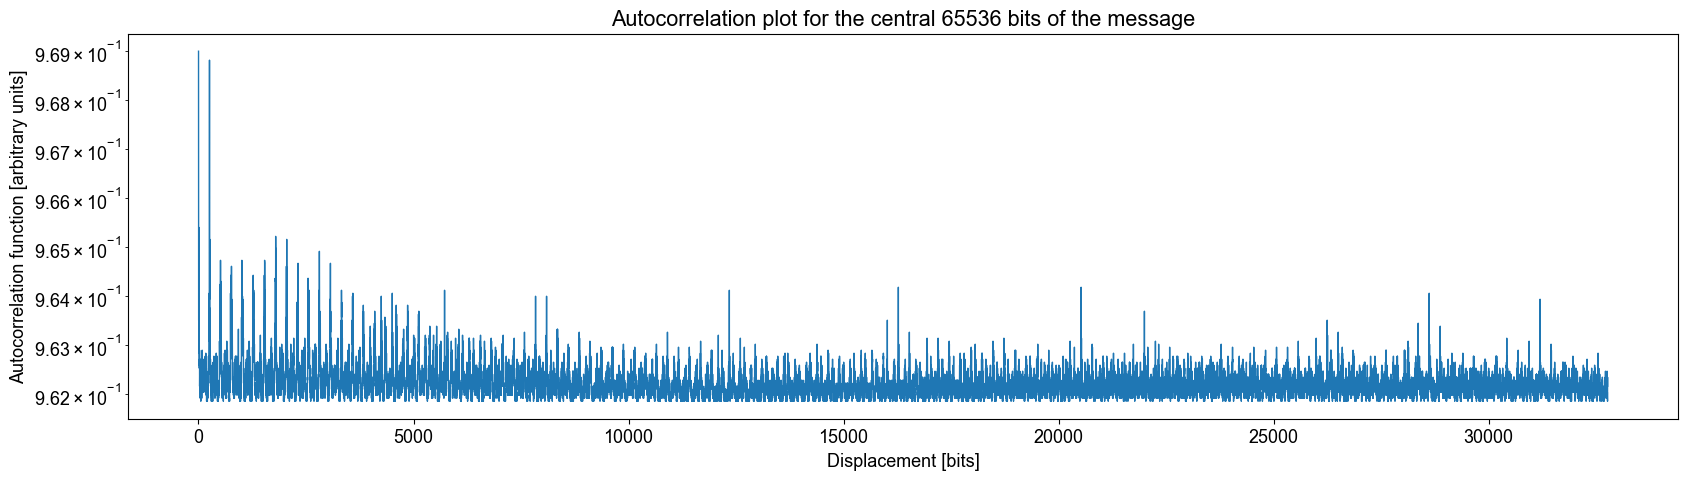

In [22]:
axis = np.arange(1, len(bits)//2)
plt.figure(figsize=(20, 5))
plt.semilogy(axis, bitscorr[axis] / bitscorr[0], linewidth = 1)
plt.xlabel('Displacement [bits]')
plt.ylabel('Autocorrelation function [arbitrary units]')
plt.title('Autocorrelation plot for the central 65536 bits of the message')

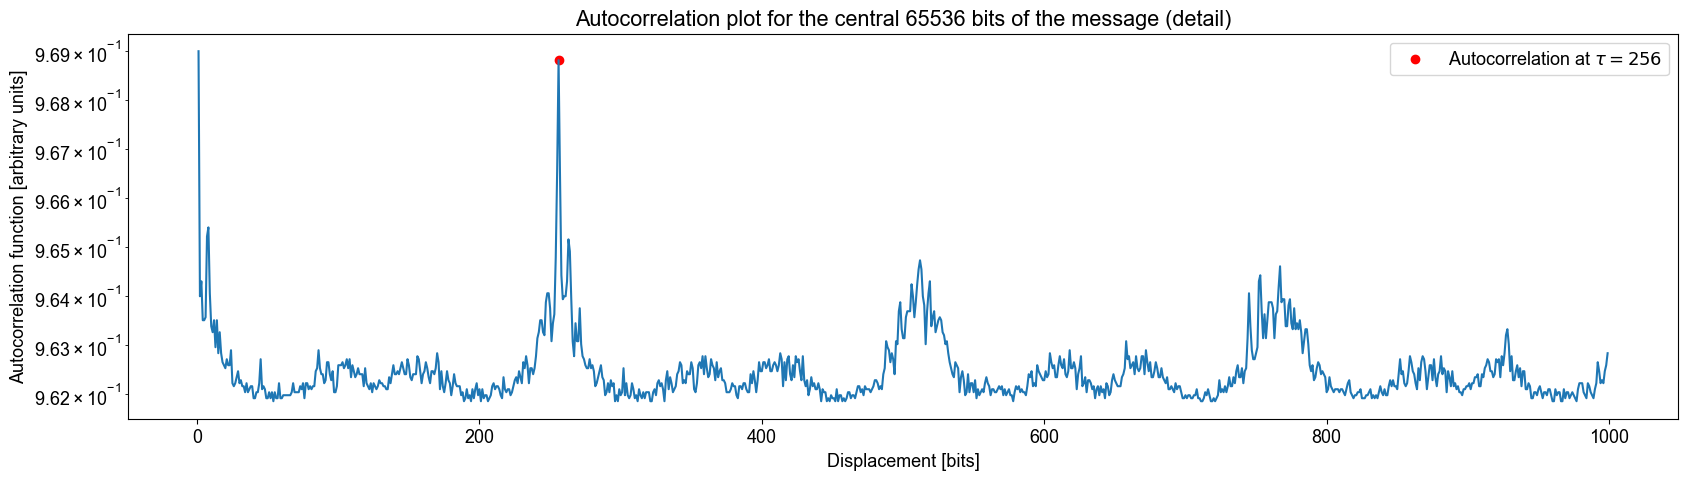

In [23]:
axis = np.arange(1, 1000)
plt.figure(figsize=(20, 5))
plt.semilogy(axis, bitscorr[axis] / bitscorr[0])
plt.scatter([256], bitscorr[256] / bitscorr[0], color = 'red', label = fr'Autocorrelation at $\tau=256$')
plt.xlabel('Displacement [bits]')
plt.ylabel('Autocorrelation function [arbitrary units]')
plt.title('Autocorrelation plot for the central 65536 bits of the message (detail)')
plt.legend()

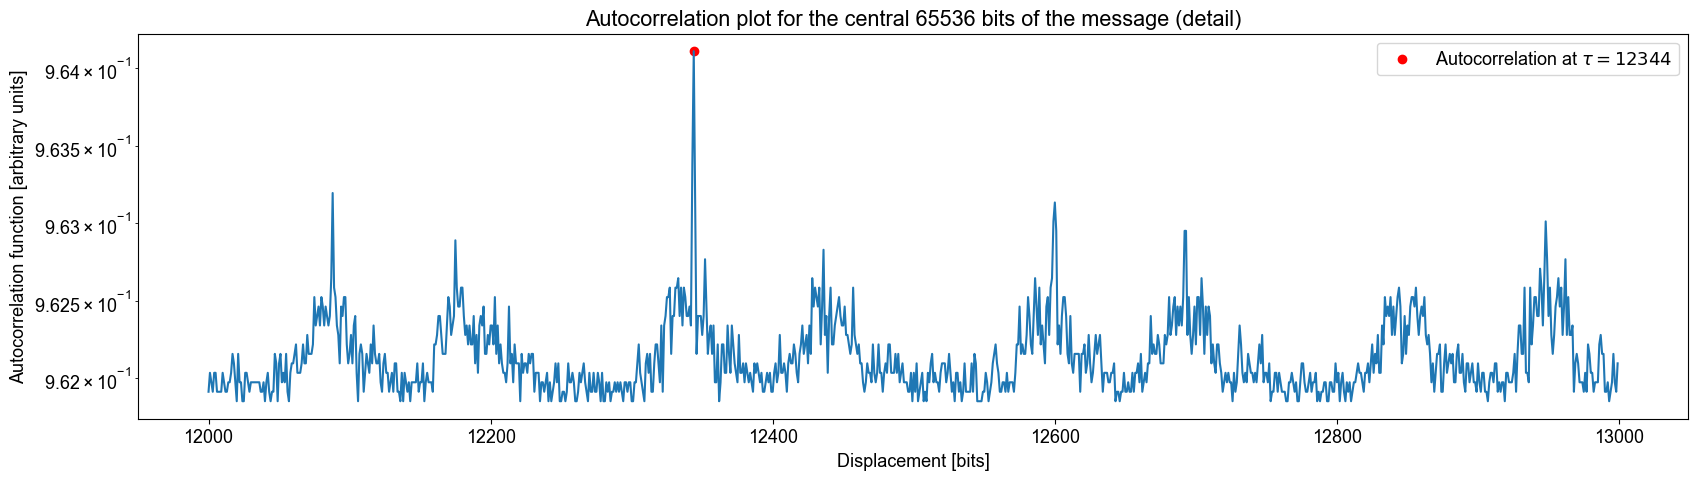

In [24]:
axis = np.arange(12000, 13000)
plt.figure(figsize=(20, 5))
plt.semilogy(axis, bitscorr[axis] / bitscorr[0])
other = 12344
plt.scatter([other], bitscorr[other] / bitscorr[0], color = 'red', label = fr'Autocorrelation at $\tau={other}$')
plt.xlabel('Displacement [bits]')
plt.ylabel('Autocorrelation function [arbitrary units]')
plt.title('Autocorrelation plot for the central 65536 bits of the message (detail)')
plt.legend()